In [1]:
import warnings
import re
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Bidirectional, LSTM, GRU, Embedding
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping
from keras.utils import plot_model
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [4]:
import nltk

In [5]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [6]:
df = pd.read_csv("/content/eng_fr.csv")

In [7]:
df.head()

,English words/sentences,French words/sentences
0,Hi.,Salut!
1,Run!,Cours !
2,Run!,Courez !
3,Who?,Qui ?
4,Wow!,Ça alors !


In [8]:
df.rename(columns = {'English words/sentences':'English', 'French words/sentences':'French'}, inplace=True)

In [9]:
df.head()

,English,French
0,Hi.,Salut!
1,Run!,Cours !
2,Run!,Courez !
3,Who?,Qui ?
4,Wow!,Ça alors !


In [10]:
df.shape

(175621, 2)

In [11]:
df.isna().sum()

English    0
French     0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df2 = df.sample(frac = 1)

In [14]:
df.shape

(175621, 2)

In [15]:
df.head()

,English,French
0,Hi.,Salut!
1,Run!,Cours !
2,Run!,Courez !
3,Who?,Qui ?
4,Wow!,Ça alors !


In [16]:
df2.shape

(175621, 2)

In [17]:
df2.head()

,English,French
109390,I never stop thinking about you.,Je ne cesse de penser à toi.
9972,Are you winning?,Tu gagnes ?
33529,Dating is exhausting.,Sortir avec des garçons est épuisant.
117653,We must take care of the elderly.,On doit prendre soin des personnes âgées.
58185,What happens after that?,Que s'est-il passé après cela ?


In [18]:
df2.reset_index(inplace = True, drop = True)

In [19]:
df2.head()

,English,French
0,I never stop thinking about you.,Je ne cesse de penser à toi.
1,Are you winning?,Tu gagnes ?
2,Dating is exhausting.,Sortir avec des garçons est épuisant.
3,We must take care of the elderly.,On doit prendre soin des personnes âgées.
4,What happens after that?,Que s'est-il passé après cela ?


In [20]:
english = df2['English'][:50000]
french = df2['French'][:50000]

In [21]:
english.shape

(50000,)

In [22]:
def cleaning_process(text):
  text = text.lower()
  text = re.sub(re.compile("[^a-z!?',]"), '', text)
  text = nltk.word_tokenize(text)
  text = " ".join([i.strip() for i in text])
  return text

In [23]:
english_cleaned = english.apply(lambda x: cleaning_process(x))
french_cleaned = french.apply(lambda x: cleaning_process(x))

In [24]:
store_eng = set()
store_french = set()

for x in english:
  for word in x.split(' '):
    if word not in store_eng:
      store_eng.add(word)


for x in french:
  for word in x.split(' '):
    if word not in store_french:
      store_french.add(word)

In [25]:
len(store_eng)

16528

In [26]:
len(store_french)

26559

In [27]:
english_sent = english.apply(lambda x: len(x.split()))
french_sent = french.apply(lambda x: len(x.split()))

In [28]:
max_english_sent = max(english_sent)
max_french_sent = max(french_sent)

In [29]:
print("english: ", max_english_sent)
print("french: ", max_french_sent)

english:  44
french:  55


In [30]:
english_vocab = 16370
french_vocab = 26310
english_sentence_max = 50
french_sentence_max = 50

In [31]:
make_tokens = Tokenizer()
make_tokens.fit_on_texts(english)
encoded_english = make_tokens.texts_to_sequences(english)
padded_english = pad_sequences(encoded_english, maxlen=english_sentence_max, padding='post')

In [32]:
padded_english

array([[   1,   95,  198, ...,    0,    0,    0],
       [  20,    2, 1780, ...,    0,    0,    0],
       [1689,    6, 4391, ...,    0,    0,    0],
       ...,
       [  73,   75,    2, ...,    0,    0,    0],
       [   1,   55,  848, ...,    0,    0,    0],
       [  22,    5,  299, ...,    0,    0,    0]], dtype=int32)

In [33]:
padded_english.shape

(50000, 50)

In [34]:
make_tokens.fit_on_texts(french)
encoded_french = make_tokens.texts_to_sequences(french)
padded_french = pad_sequences(encoded_french, maxlen=french_sentence_max, padding='post')

In [35]:
padded_french

array([[    3,    13,  2528, ...,     0,     0,     0],
       [   16, 18085,     0, ...,     0,     0,     0],
       [  643,    79,    63, ...,     0,     0,     0],
       ...,
       [    3,    72,  4325, ...,     0,     0,     0],
       [    3, 26025,    12, ...,     0,     0,     0],
       [  267,   397,   878, ...,     0,     0,     0]], dtype=int32)

In [36]:
padded_french.shape

(50000, 50)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(padded_english, padded_french, test_size = 0.2, shuffle = True, random_state = 100)

In [38]:
X_train.shape

(40000, 50)

In [39]:
y_train.shape

(40000, 50)

In [40]:
X_train

array([[  35,  131, 7399, ...,    0,    0,    0],
       [  72,  141,    8, ...,    0,    0,    0],
       [  23,  220,    1, ...,    0,    0,    0],
       ...,
       [  13,    6,    4, ...,    0,    0,    0],
       [  26,  190,    4, ...,    0,    0,    0],
       [  86,    2,   74, ...,    0,    0,    0]], dtype=int32)

In [41]:
y_train

array([[  242,     6,   748, ...,     0,     0,     0],
       [  839,    17,   803, ...,     0,     0,     0],
       [    3,    43, 22959, ...,     0,     0,     0],
       ...,
       [   54,    15,  1037, ...,     0,     0,     0],
       [   54,    24,    62, ...,     0,     0,     0],
       [  914,    10,    18, ...,     0,     0,     0]], dtype=int32)

In [42]:
max_len = 50

#encoder layer
encoder_input = keras.Input(shape=(max_len,), name = "encoder_input")
embedd = Embedding(input_dim=english_vocab, output_dim=100, input_length= english_sentence_max)(encoder_input)
encoder_lstm = LSTM(256,activation="tanh",return_sequences=True,return_state=True)(embedd)
encoder_lstm2 = LSTM(256,activation="tanh",return_state=True)(encoder_lstm)
_, state_h , state_c = encoder_lstm2
encoder_states = [state_h , state_c]


#decoder layer
decoder_input = keras.Input(shape=(max_len,), name="decoder_input")
decoder_embed = Embedding(input_dim=french_vocab, output_dim = 100, input_length = french_sentence_max)(decoder_input)
decoder_lstm = LSTM(256, activation="tanh", return_sequences=True, return_state=True)
decoder_outputs , _ , _ = decoder_lstm(decoder_embed, initial_state = encoder_states)
decoder_dense = Dense(french_vocab, activation='softmax')
outputs = decoder_dense(decoder_outputs)

In [43]:
model = Model([encoder_input, decoder_input], outputs)

In [44]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 50)]                 0         []                            
                                                                                                  
 embedding (Embedding)       (None, 50, 100)              1637000   ['encoder_input[0][0]']       
                                                                                                  
 decoder_input (InputLayer)  [(None, 50)]                 0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 50, 256),            365568    ['embedding[0][0]']           
                              (None, 256),                                                    

In [45]:
call = EarlyStopping(patience=10)

In [46]:
compiled = model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

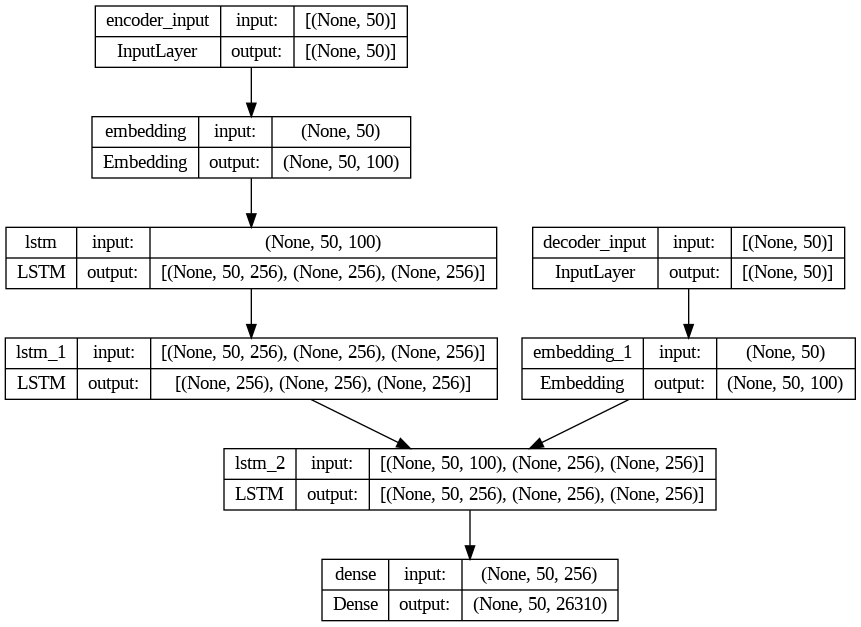

In [47]:
plot_model(model, to_file='modelsummary.png', show_shapes=True, show_layer_names=True)

In [48]:
history = model.fit([X_train, X_train], y_train , validation_data=([X_test, X_test], y_test) ,epochs = 100, callbacks = call, verbose = True)

Epoch 1/100
1250/1250 [==============================] - 119s 87ms/step - loss: 1.0356 - accuracy: 0.8702 - val_loss: 0.9225 - val_accuracy: 0.8722
Epoch 2/100
1250/1250 [==============================] - 102s 81ms/step - loss: 0.9094 - accuracy: 0.8736 - val_loss: 0.8944 - val_accuracy: 0.8754
Epoch 3/100
1250/1250 [==============================] - 102s 81ms/step - loss: 0.8806 - accuracy: 0.8761 - val_loss: 0.8709 - val_accuracy: 0.8775
Epoch 4/100
1250/1250 [==============================] - 100s 80ms/step - loss: 0.8575 - accuracy: 0.8795 - val_loss: 0.8528 - val_accuracy: 0.8808
Epoch 5/100
1250/1250 [==============================] - 100s 80ms/step - loss: 0.8382 - accuracy: 0.8823 - val_loss: 0.8409 - val_accuracy: 0.8824
Epoch 6/100
1250/1250 [==============================] - 93s 74ms/step - loss: 0.8221 - accuracy: 0.8839 - val_loss: 0.8310 - val_accuracy: 0.8839
Epoch 7/100
1250/1250 [==============================] - 100s 80ms/step - loss: 0.8076 - accuracy: 0.8855 - val_l

In [49]:
model.save('my_model.keras')

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

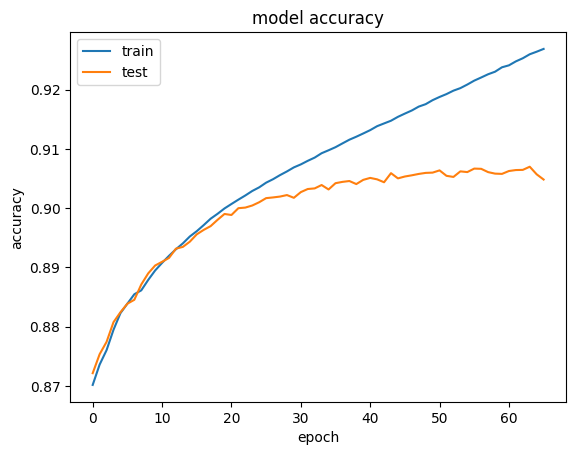

In [52]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

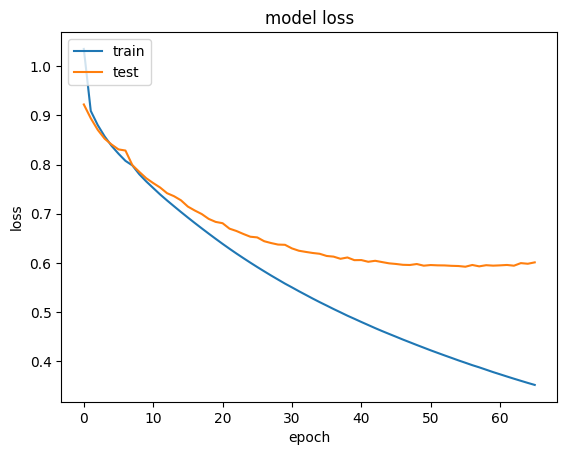

In [53]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

In [ ]:
def preprocess(lines):
  text = cleaning_process(str(lines))
  make_tokens.fit_on_texts(text)
  encoded_text = make_tokens.texts_to_sequences(text)
  padded_text = pad_sequences(encoded_text, maxlen=english_sentence_max, padding='post')
  prediction = model.predict([padded_text, padded_text])
  output_translation = np.argmax(prediction,axis=-1)


  output_sentence = []
  for i in output_translation[0]:
      if i in make_tokens.index_word:
          output_sentence.append(make_tokens.index_word[i])
      else:
          output_sentence.append(' ')
  return ' '.join(output_sentence)

input_sentence = "What happens after that?"
translated = preprocess(input_sentence)
print(f"Input: {input_sentence}")
print(f"Translated: {translated}")